# Homework 2 - Soccer analytics


In [3]:
#We import the necessary libraries to organize data and plot the Bundesliga League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
with open(r"C:\Users\Nino\Desktop\matches_Germany.json", 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)


In [191]:
with open(r"C:\Users\Nino\Desktop\teams.json", 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)


In [169]:
with open(r"C:\Users\Nino\Desktop\players.json", 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)


In [165]:
with open(r"C:\Users\Nino\Desktop\events_Germany.json", 'r') as myfile:
    data = myfile.read()
e = json.loads(data)
events = pd.DataFrame(e)


In [140]:
with open(r"C:\Users\Nino\Desktop\coaches.json", 'r') as myfile:
    data = myfile.read()
co = json.loads(data)
coaches = pd.DataFrame(co)

# Exploratory Data Analysis
All the analysis from RQ1 to RQ5, are performed only over the Bundesliga League dataset.

# [RQ1] Who wants to be a Champion?


### Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
For this task, we need the dataframes matches and teams.
In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the Bundesliga League season 2017/2018.

We load the 'matches_Germany' and 'teams' json files, and produce the pandas dataframe

In [57]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","[{'refereeId': 379444, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",Allianz Arena,2445,2517036
1,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hoffenheim - Borussia Dortmund, 3 - 1","[{'refereeId': 384936, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",WIRSOL Rhein-Neckar-Arena,2482,2517037
2,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hertha BSC - RB Leipzig, 2 - 6","[{'refereeId': 387276, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",Olympiastadion Berlin,2975,2517038
3,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Freiburg - Augsburg, 2 - 0","[{'refereeId': 378957, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",Schwarzwald-Stadion,2453,2517039
4,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Schalke 04 - Eintracht Frankfurt, 1 - 0","[{'refereeId': 387273, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",VELTINS-Arena,2449,2517040


In [66]:
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


#### Create a dataframe of all the Bundesliag League teams
We will produce a new dataframe 'germany' from 'teams' to get rid of all the useless information, keeping only the rows with area tag {'name': 'Germany'}

In [30]:
germany = teams[teams['area'] == {"name": "Germany", "id": "276", "alpha3code": "DEU", "alpha2code": "DE"}]
germany.head()

,area,city,name,officialName,type,wyId
7,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00f6nchengladbach,Borussia M'gladbach,Borussia VfL M\u00f6nchengladbach,club,2454
28,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Bremen,Werder Bremen,SV Werder Bremen,club,2443
29,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Leverkusen,Bayer Leverkusen,TSV Bayer 04 Leverkusen,club,2446
30,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Dortmund,Borussia Dortmund,BV Borussia 09 Dortmund,club,2447
31,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00fcnchen,Bayern M\u00fcnchen,FC Bayern M\u00fcnchen,club,2444


In [68]:
len(germany.index) #Counting the rows

18

We create a dataframe with only the columns 'name' and 'wyId', that are what we need to complete our task.

In [31]:
Gerteam = pd.DataFrame(germany['name'])
Gerteam['code'] = germany['wyId']
Gerteam = Gerteam.sort_values('code') #sorting values by 'code'
Gerteam = Gerteam.reset_index(drop=True) #reindexing

Gerteam.head()

,name,code
0,Werder Bremen,2443
1,Bayern M\u00fcnchen,2444
2,Stuttgart,2445
3,Bayer Leverkusen,2446
4,Borussia Dortmund,2447


From the dataframe 'matches' we only need the 'gameweek' and 'winner' columns, so we create the Premier dataframe.

In [32]:
Bundes = pd.DataFrame(matches['gameweek'])
Bundes['winner'] = matches['winner']
Bundes['result'] = matches['label']
Bundes = Bundes.sort_values('gameweek')
Bundes = Bundes.reset_index(drop=True)

Bundes[:8]

,gameweek,winner,result
0,1,2444,"Bayern M\u00fcnchen - Bayer Leverkusen, 3 - 1"
1,1,2454,"Borussia M'gladbach - K\u00f6ln, 1 - 0"
2,1,0,"Freiburg - Eintracht Frankfurt, 0 - 0"
3,1,2449,"Schalke 04 - RB Leipzig, 2 - 0"
4,1,2447,"Wolfsburg - Borussia Dortmund, 0 - 3"
5,1,2457,"Hertha BSC - Stuttgart, 2 - 0"
6,1,2450,"Hamburger SV - Augsburg, 1 - 0"
7,1,2455,"Mainz 05 - Hannover 96, 0 - 1"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

#### Creating the ranking with all the points of each team during the 38 weeks of the season.

We start by adding 38 week columns to the Engteam dataframe.

In [33]:
for i in range(1,39):
    Gerteam['week {}'.format(i)] = 0
Gerteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Werder Bremen,2443,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bayern M\u00fcnchen,2444,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Stuttgart,2445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bayer Leverkusen,2446,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Borussia Dortmund,2447,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#Creating copy dataframes to avoid damaging the original ones
G = Gerteam.copy()
B = Bundes.copy()

Now we are ready to complete the G dataframe with all the results.

In [75]:
for i in range(306): #There are 306 total matches in the Bundesliga league.
    if B['winner'][i] != 0: #If there is not a draw
        
        #Adding 3 as value if the wyId code is the same as the 'winner' code in P
        G.loc[G['code'] == B['winner'][i], ['week {}'.format(B['gameweek'][i])]] = 3
        
    else:
        for j in range(18):
            
            if G['name'][j] in B['result'][i]:#If the team name is in the 'result' value
                G.at[j, 'week {}'.format(B['gameweek'][i])] = 1
G

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Werder Bremen,2443,0,0,1,0,1,1,1,0,...,0,1,0,1,1,3,0,0,0,0
1,Bayern M\u00fcnchen,2444,3,3,0,3,3,1,1,3,...,3,3,3,3,3,0,0,0,0,0
2,Stuttgart,2445,0,3,0,3,0,1,0,3,...,0,1,3,3,3,3,0,0,0,0
3,Bayer Leverkusen,2446,0,1,0,3,0,3,1,1,...,3,3,0,0,1,3,0,0,0,0
4,Borussia Dortmund,2447,3,3,1,3,3,3,3,0,...,3,0,3,1,0,0,0,0,0,0
5,Schalke 04,2449,3,0,3,3,0,0,1,3,...,1,3,1,1,3,3,0,0,0,0
6,Hamburger SV,2450,3,3,0,0,0,0,1,0,...,1,0,3,3,0,3,0,0,0,0
7,Wolfsburg,2451,0,3,1,0,1,1,1,1,...,3,1,0,0,0,3,0,0,0,0
8,Freiburg,2453,1,0,1,0,1,1,3,0,...,0,0,0,3,0,3,0,0,0,0
9,Borussia M'gladbach,2454,3,1,0,1,3,0,3,3,...,3,0,3,1,3,0,0,0,0,0


#### Creating the plot

In [76]:
G = G.loc[:, 'week 1':] #we remove the 'names' and 'code' columns, we don't need them anymore


Now, we need to list of the result of each team so that we can sum them and plot the summed result of each team.

In [77]:
Graf = G.values.tolist()
Grafv = list(Graf)


In [78]:
for i in range(18):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j] #Summing every week result with the past ones


We can finally plot. 

In [79]:
wg = []
for i in range(1,39):
    wg.append('{}'.format(i)) # x ticks of every week

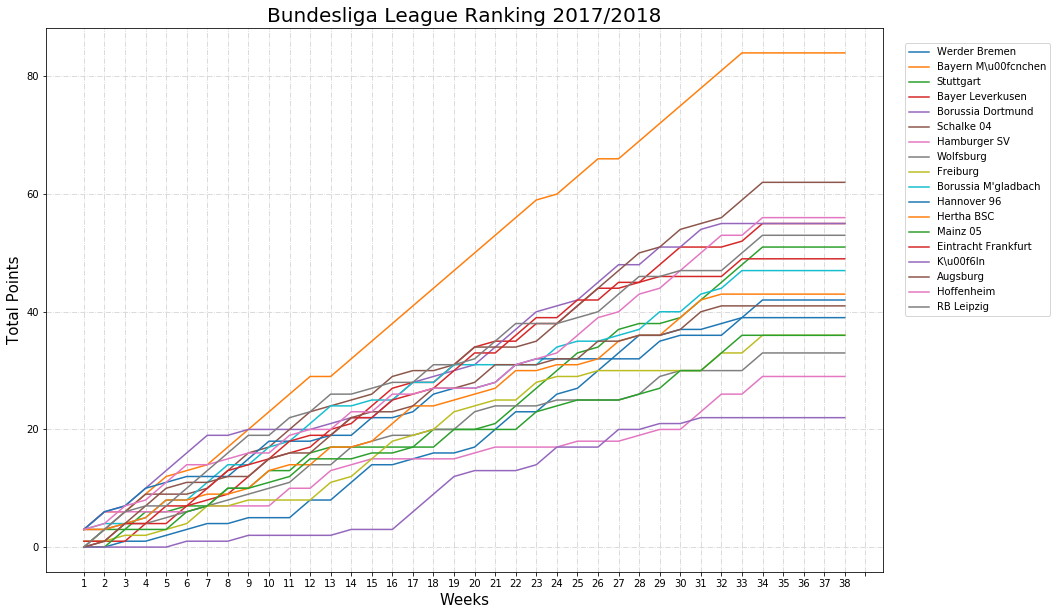

In [81]:
plt.figure(figsize=(15,10))
for i in range(18):
    plt.plot(Grafv[i], label = Gerteam['name'][i])
    
plt.xticks(range(0,39),wg, size = 10)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('Bundesliga League Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

#### Finding the two best and worst teams

We now define a function to find the teams with most consecutive wins and losses. 

In [89]:
def bestornot(n):
    r = G.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r


In [90]:
bestornot(3)#most consecutive wins for team in the season

['333',
 '3333333333',
 '3333',
 '33',
 '3333',
 '33333',
 '33',
 '3',
 '33',
 '33',
 '33',
 '33',
 '33',
 '33',
 '333',
 '333',
 '333',
 '3333']

In [85]:
Gerteam.at[1, 'name']#best team

'Bayern M\\u00fcnchen'

In [87]:
Gerteam.at[5, 'name']#second best

'Schalke 04'

Now, we can do the same with losses:

In [88]:
bestornot(0)#most consecutive losses for team in the season

['0000',
 '00000',
 '0000',
 '0000',
 '000000',
 '0000',
 '0000',
 '0000',
 '00000',
 '00000',
 '00000',
 '000000',
 '00000',
 '00000',
 '0000000',
 '000000',
 '0000',
 '0000']

In [92]:
Gerteam.at[14,'name']#worst team

'K\\u00f6ln'

In [94]:
print(Gerteam.at[4,'name'])#second worst
print(Gerteam.at[11,'name'])
print(Gerteam.at[15,'name'])


Borussia Dortmund
Hertha BSC
Augsburg


# [RQ2] Is there a home-field advantage?

In [11]:
matches
#let's watch our dataframe

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","[{'refereeId': 379444, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",Allianz Arena,2445,2517036
1,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hoffenheim - Borussia Dortmund, 3 - 1","[{'refereeId': 384936, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",WIRSOL Rhein-Neckar-Arena,2482,2517037
2,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hertha BSC - RB Leipzig, 2 - 6","[{'refereeId': 387276, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",Olympiastadion Berlin,2975,2517038
3,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Freiburg - Augsburg, 2 - 0","[{'refereeId': 378957, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",Schwarzwald-Stadion,2453,2517039
4,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Schalke 04 - Eintracht Frankfurt, 1 - 0","[{'refereeId': 387273, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",VELTINS-Arena,2449,2517040
5,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Bayer Leverkusen - Hannover 96, 3 - 2","[{'refereeId': 381835, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2455': {'scoreET': 0, 'coachId': 19925, 'sid...",BayArena,2446,2517041
6,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hamburger SV - Borussia M'gladbach, 2 - 1","[{'refereeId': 384898, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2454': {'scoreET': 0, 'coachId': 15114, 'sid...",Volksparkstadion,2450,2517042
7,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Mainz 05 - Werder Bremen, 1 - 2","[{'refereeId': 378970, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2443': {'scoreET': 0, 'coachId': 367510, 'si...",OPEL ARENA,2443,2517043
8,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Wolfsburg - K\u00f6ln, 4 - 1","[{'refereeId': 459927, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2451': {'scoreET': 0, 'coachId': 14735, 'sid...",VOLKSWAGEN ARENA,2451,2517044
9,426,"May 5, 2018 at 3:30:00 PM GMT+2",2018-05-05 13:30:00,Regular,33,"Borussia Dortmund - Mainz 05, 1 - 2","[{'refereeId': 378945, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2460': {'scoreET': 0, 'coachId': 228372, 'si...",Signal-Iduna-Park,2460,2517027


In [12]:
matches.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [13]:
workingData = matches['label']
workingData.head()
#we are interested in label because it gives the info of the teams that were playing and the result of the game

0     Bayern M\u00fcnchen - Stuttgart, 1 - 4
1      Hoffenheim - Borussia Dortmund, 3 - 1
2             Hertha BSC - RB Leipzig, 2 - 6
3                 Freiburg - Augsburg, 2 - 0
4    Schalke 04 - Eintracht Frankfurt, 1 - 0
Name: label, dtype: object

I will split this columns in teams and result to have a better view and accessibility of the info in every row.

In [14]:
wkd = pd.DataFrame(workingData)
wkd.head()

,label
0,"Bayern M\u00fcnchen - Stuttgart, 1 - 4"
1,"Hoffenheim - Borussia Dortmund, 3 - 1"
2,"Hertha BSC - RB Leipzig, 2 - 6"
3,"Freiburg - Augsburg, 2 - 0"
4,"Schalke 04 - Eintracht Frankfurt, 1 - 0"


In [15]:
new = wkd["label"].str.split(",", n = 1, expand = True)
new.head()
#we created a table with the match and the result, now we can split for HomeMatch and NotHomeMatch

,0,1
0,Bayern M\u00fcnchen - Stuttgart,1 - 4
1,Hoffenheim - Borussia Dortmund,3 - 1
2,Hertha BSC - RB Leipzig,2 - 6
3,Freiburg - Augsburg,2 - 0
4,Schalke 04 - Eintracht Frankfurt,1 - 0


In [16]:
new.rename(columns = {0 :'Match',1 :'Result'}, inplace = True)

In [17]:
new.columns

Index(['Match', 'Result'], dtype='object')

In [18]:
Mtc = new["Match"].str.split("-", n = 1, expand = True)
Mtc.head()
#the teams

,0,1
0,Bayern M\u00fcnchen,Stuttgart
1,Hoffenheim,Borussia Dortmund
2,Hertha BSC,RB Leipzig
3,Freiburg,Augsburg
4,Schalke 04,Eintracht Frankfurt


In [34]:
Rst = new["Result"].str.split("-", n = 1, expand = True)
Rst.head()
#the goals

,0,1
0,1,4
1,3,1
2,2,6
3,2,0
4,1,0


In [35]:
alldata = pd.DataFrame({'Home':Mtc[0], 'ResH':Rst[0], 'ResNH':Rst[1],'Nhome':Mtc[1]})
alldata.head()
#this is the dataframe I wanted to organize

,Home,ResH,ResNH,Nhome
0,Bayern M\u00fcnchen,1,4,Stuttgart
1,Hoffenheim,3,1,Borussia Dortmund
2,Hertha BSC,2,6,RB Leipzig
3,Freiburg,2,0,Augsburg
4,Schalke 04,1,0,Eintracht Frankfurt


Now we try to find the Winner, or Draw, for every Match, so we can add this to my previous table in a column called 'Winner'

In [36]:
l = []
for i in range(len(alldata)):
    a = int(alldata.loc[i,'ResH'])
    b = int(alldata.loc[i,'ResNH'])
    #print(a,b)
    if a==b:
       # print('1')
        l.append('Draw')
    elif a>b:
        l.append(alldata.loc[i,'Home'])
       #print('2')
    elif a<b:
        l.append(alldata.loc[i,'Nhome'])
       # print('3')
    
l

[' Stuttgart',
 'Hoffenheim ',
 ' RB Leipzig',
 'Freiburg ',
 'Schalke 04 ',
 'Bayer Leverkusen ',
 'Hamburger SV ',
 ' Werder Bremen',
 'Wolfsburg ',
 ' Mainz 05',
 'RB Leipzig ',
 ' Bayern M\\u00fcnchen',
 'Draw',
 "Borussia M'gladbach ",
 'Eintracht Frankfurt ',
 ' Schalke 04',
 'Hannover 96 ',
 'Stuttgart ',
 'Draw',
 'Mainz 05 ',
 ' Stuttgart',
 'Bayern M\\u00fcnchen ',
 'Draw',
 'Freiburg ',
 'Draw',
 ' Hamburger SV',
 'Hoffenheim ',
 'Draw',
 'Augsburg ',
 'Borussia Dortmund ',
 ' Hoffenheim',
 ' Hertha BSC',
 'Hamburger SV ',
 ' Bayern M\\u00fcnchen',
 'Stuttgart ',
 "Borussia M'gladbach ",
 'Mainz 05 ',
 'Draw',
 'Schalke 04 ',
 'Bayern M\\u00fcnchen ',
 'Hoffenheim ',
 'Hertha BSC ',
 'Bayer Leverkusen ',
 'Draw',
 'Draw',
 ' Bayer Leverkusen',
 'Draw',
 'Borussia Dortmund ',
 'Hamburger SV ',
 'Draw',
 ' Wolfsburg',
 "Borussia M'gladbach ",
 ' Bayern M\\u00fcnchen',
 'Hannover 96 ',
 'Draw',
 'Werder Bremen ',
 'Draw',
 'Bayern M\\u00fcnchen ',
 'Hoffenheim ',
 'Schalke 04 '

In [37]:
alldata['Winner']=l

Here it is the table that we were building.

In [38]:
alldata = alldata.reset_index(drop=True)

Now we use the teams dataset

To be casual in my indipendence test we'll take out 5 random team from the German teams, so we start from taking out every team in a column and then extract 5 casual numbers that will be the row of the casually selected team.

In [39]:
allteams = (pd.DataFrame(Gerteam['name'])).reset_index(drop=True)
allteams

,name
0,Werder Bremen
1,Bayern M\u00fcnchen
2,Stuttgart
3,Bayer Leverkusen
4,Borussia Dortmund
5,Schalke 04
6,Hamburger SV
7,Wolfsburg
8,Freiburg
9,Borussia M'gladbach


We select 5 random teams

In [75]:
import random
selected_teams = random.sample(range(18),5)
selected_teams

[16, 15, 9, 2, 0]

These are our teams:

In [111]:
B = []
for i in selected_teams:
    B.append(str(allteams.loc[i,'name']))
B

['Hoffenheim', 'Augsburg', "Borussia M'gladbach", 'Stuttgart', 'Werder Bremen']

## For 5 different teams of Premier Bundesliga, show the contingency table (outcome x side).

Here we'll illustrate the process to create a contingency table for the first team, for the others there is a cell with the compact code of this procedure

In [112]:
home = alldata[alldata['Home'].str.contains(B[0])]
home
# select the rows that have in home the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
1,Hoffenheim,3,1,Borussia Dortmund,Hoffenheim
26,Hoffenheim,3,1,Hannover 96,Hoffenheim
40,Hoffenheim,2,0,Hamburger SV,Hoffenheim
58,Hoffenheim,6,0,K\u00f6ln,Hoffenheim
77,Hoffenheim,3,0,Wolfsburg,Hoffenheim
95,Hoffenheim,1,1,Freiburg,Draw
112,Hoffenheim,4,2,Mainz 05,Hoffenheim
138,Hoffenheim,1,4,Bayer Leverkusen,Bayer Leverkusen
166,Hoffenheim,1,0,Stuttgart,Hoffenheim
184,Hoffenheim,4,0,RB Leipzig,Hoffenheim


In [113]:
not_home = alldata[alldata['Nhome'].str.contains(B[0])]
alldata[alldata['Nhome'].str.contains(B[0])]
# select the rows that have in Nhome the team that I have to analyze

,Home,ResH,ResNH,Nhome,Winner
17,Stuttgart,2,0,Hoffenheim,Stuttgart
30,RB Leipzig,2,5,Hoffenheim,Hoffenheim
46,Eintracht Frankfurt,1,1,Hoffenheim,Draw
67,Borussia M'gladbach,3,3,Hoffenheim,Draw
86,Augsburg,0,2,Hoffenheim,Hoffenheim
102,Schalke 04,2,1,Hoffenheim,Schalke 04
120,Hertha BSC,1,1,Hoffenheim,Draw
129,Bayern M\u00fcnchen,5,2,Hoffenheim,Bayern M\u00fcnchen
148,Werder Bremen,1,1,Hoffenheim,Draw
155,Borussia Dortmund,2,1,Hoffenheim,Borussia Dortmund


In [115]:
home['Winner'].str.replace(" ","")
not_home['Winner'].str.replace(" ","")
home

,Home,ResH,ResNH,Nhome,Winner
1,Hoffenheim,3,1,Borussia Dortmund,Hoffenheim
26,Hoffenheim,3,1,Hannover 96,Hoffenheim
40,Hoffenheim,2,0,Hamburger SV,Hoffenheim
58,Hoffenheim,6,0,K\u00f6ln,Hoffenheim
77,Hoffenheim,3,0,Wolfsburg,Hoffenheim
95,Hoffenheim,1,1,Freiburg,Draw
112,Hoffenheim,4,2,Mainz 05,Hoffenheim
138,Hoffenheim,1,4,Bayer Leverkusen,Bayer Leverkusen
166,Hoffenheim,1,0,Stuttgart,Hoffenheim
184,Hoffenheim,4,0,RB Leipzig,Hoffenheim


Now we create 6 values indicating the number of wins, losses or draws playing at home or not home.

In [116]:
Whome = len(home[home['Winner'].str.contains(B[0])])
#Whome
Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
Lhome = len(home)-Whome-Dhome
#print(Whome,Dhome,Lhome)

In [117]:
Wout = len(not_home[not_home['Winner'].str.contains(B[0])])
#Whome
Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
Lout = len(not_home)-Wout-Dout

In [118]:
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)

In [119]:
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}

In [120]:
Sa = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[0])))

In [121]:
Sa
#this is the table for the first team

,Win,Loss,Draw,Total
Hoffenheim,,,,
Home,11,2,4,17
Not Home,4,7,6,17
Total,15,9,10,34


As we said here we'll do the same for the five teams in a for loop, later are diplayed the tables for every team.

In [122]:
Sa = []
for i in range(0,5):
    home = alldata[alldata['Home'].str.contains(B[i])]
    not_home = alldata[alldata['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    Whome = len(home[home['Winner'].str.contains(B[i])])
#Whome
    Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
    Lhome = len(home)-Whome-Dhome
    Wout = len(not_home[not_home['Winner'].str.contains(B[i])])
#Whome
    Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
    Lout = len(not_home)-Wout-Dout
    W = np.array([Whome,Wout, Whome + Wout],dtype = object)
    L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
    D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
    T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
    raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
    Sa.append(pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[i]))))

In [123]:
Sa[0]
#1st team

,Win,Loss,Draw,Total
Hoffenheim,,,,
Home,11,2,4,17
Not Home,4,7,6,17
Total,15,9,10,34


In [124]:
Sa[1]
#2nd team

,Win,Loss,Draw,Total
Augsburg,,,,
Home,6,7,4,17
Not Home,4,6,7,17
Total,10,13,11,34


In [125]:
Sa[2]
#3rd team

,Win,Loss,Draw,Total
Borussia M'gladbach,,,,
Home,9,4,4,17
Not Home,4,9,4,17
Total,13,13,8,34


In [126]:
Sa[3]
#4th team

,Win,Loss,Draw,Total
Stuttgart,,,,
Home,10,3,4,17
Not Home,5,10,2,17
Total,15,13,6,34


In [127]:
Sa[4]
#5th team

,Win,Loss,Draw,Total
Werder Bremen,,,,
Home,6,4,7,17
Not Home,4,8,5,17
Total,10,12,12,34


## Second part-X^2 test

We start saving the results of everyone of the 5 teams without intersections with each other, then create a unique contingency table with the summed values.

In [92]:
print(B)

['Hoffenheim', 'Augsburg', "Borussia M'gladbach", 'Stuttgart', 'Werder Bremen']


In [94]:
alldata.head()

,Home,ResH,ResNH,Nhome,Winner
0,Bayern M\u00fcnchen,1,4,Stuttgart,Stuttgart
1,Hoffenheim,3,1,Borussia Dortmund,Hoffenheim
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
3,Freiburg,2,0,Augsburg,Freiburg
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04


In [128]:
alldata1 = alldata[~alldata['Home'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[4])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[4])]
alldata1
#the dataset from which we take the results of team 1

,Home,ResH,ResNH,Nhome,Winner
1,Hoffenheim,3,1,Borussia Dortmund,Hoffenheim
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04
5,Bayer Leverkusen,3,2,Hannover 96,Bayer Leverkusen
8,Wolfsburg,4,1,K\u00f6ln,Wolfsburg
9,Borussia Dortmund,1,2,Mainz 05,Mainz 05
10,RB Leipzig,4,1,Wolfsburg,RB Leipzig
11,K\u00f6ln,1,3,Bayern M\u00fcnchen,Bayern M\u00fcnchen
14,Eintracht Frankfurt,3,0,Hamburger SV,Eintracht Frankfurt
16,Hannover 96,3,1,Hertha BSC,Hannover 96


In [129]:
alldata2 = alldata[~alldata['Home'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[4])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[4])]
alldata2.head()
#the dataset from which we take the results of team 2

,Home,ResH,ResNH,Nhome,Winner
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
3,Freiburg,2,0,Augsburg,Freiburg
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04
5,Bayer Leverkusen,3,2,Hannover 96,Bayer Leverkusen
8,Wolfsburg,4,1,K\u00f6ln,Wolfsburg


In [130]:
alldata3 = alldata[~alldata['Home'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[4])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[4])]
alldata3.head()
#the dataset from which we take the results of team 3

,Home,ResH,ResNH,Nhome,Winner
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04
5,Bayer Leverkusen,3,2,Hannover 96,Bayer Leverkusen
6,Hamburger SV,2,1,Borussia M'gladbach,Hamburger SV
8,Wolfsburg,4,1,K\u00f6ln,Wolfsburg


In [131]:
alldata4 = alldata[~alldata['Home'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[4])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[4])]
alldata4.head()
#the dataset from which we take the results of team 4 B[3]

,Home,ResH,ResNH,Nhome,Winner
0,Bayern M\u00fcnchen,1,4,Stuttgart,Stuttgart
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04
5,Bayer Leverkusen,3,2,Hannover 96,Bayer Leverkusen
8,Wolfsburg,4,1,K\u00f6ln,Wolfsburg


In [132]:
alldata5 = alldata[~alldata['Home'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[3])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[3])]
alldata5.head()
#the dataset from which we take the results of team 5

,Home,ResH,ResNH,Nhome,Winner
2,Hertha BSC,2,6,RB Leipzig,RB Leipzig
4,Schalke 04,1,0,Eintracht Frankfurt,Schalke 04
5,Bayer Leverkusen,3,2,Hannover 96,Bayer Leverkusen
7,Mainz 05,1,2,Werder Bremen,Werder Bremen
8,Wolfsburg,4,1,K\u00f6ln,Wolfsburg


Now I do the same process of before but every time I sum the result of every team in a unique contingency table called CTtotal

In [133]:
vec = {B[0]:alldata1, B[1] :alldata2, B[2]: alldata3, B[3]:alldata4,B[4]: alldata5}

In [134]:
Whome=0
Dhome=0
Lhome=0
Wout=0
Dout=0
Lout=0
for i in range(len(B)):
    home = vec[B[i]][vec[B[i]]['Home'].str.contains(B[i])]
    not_home = vec[B[i]][vec[B[i]]['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    WH1=len(home[home['Winner'].str.contains(B[i])])
    DH1=len(home[home['Winner'].str.contains('Draw')])
    Whome = Whome +WH1
    Dhome =Dhome + DH1
    Lhome = Lhome +len(home)-WH1-DH1
    WO=len(not_home[not_home['Winner'].str.contains(B[i])])
    DO=len(not_home[not_home['Winner'].str.contains('Draw')])
    Wout = Wout + WO
    Dout =Dout + DO
    Lout = Lout +len(not_home)-WO-DO
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
CTtotal = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = 'The five Teams'))
CTtotal

,Win,Loss,Draw,Total
The five Teams,,,,
Home,34,14,17,65
Not Home,15,32,18,65
Total,49,46,35,130


In [103]:
#To be clear the Teams were 
print(B)

['Hoffenheim', 'Augsburg', "Borussia M'gladbach", 'Stuttgart', 'Werder Bremen']


In [135]:
CT = CTtotal.drop(columns = ['Total'])
CT = CT.drop('Total')
CT

,Win,Loss,Draw
The five Teams,,,
Home,34,14,17
Not Home,15,32,18


In [136]:
from scipy.stats import chi2_contingency

In [137]:
#Assumption of independence
chi2, p, dof, expec = chi2_contingency(CT)

In [138]:
chi2

14.439396628216503

In [108]:
p

0.000732023226651416

In [109]:
dof

2

In [74]:
expec

array([[25.5, 21. , 18.5],
       [25.5, 21. , 18.5]])

We put a singificance of 5% and there are 2 degrees of freedom, so, from the X^2 squared table, the X^2 should not be greater than 5.99, which in this case there is a large differnece between them. So we reject the null hypothesis of indipendence. There is home field advantage. 

# comparison

In the last analysis of primier league we got the result that there is not home field advantage, but in Bundesliga we came to the result that there is home field advantage( I also picked those 5 teams 3 times but the result was the same) So maybe German people are sensetive to that variable than British !

# [RQ3] Which teams have the youngest coaches?

Let's start analyzing the coaches database, we'll see that we can find the info about every birthDate and an Id(wyId)

In [141]:
coaches

,birthArea,birthDate,currentTeamId,firstName,lastName,middleName,passportArea,shortName,wyId
0,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",None,0,César Domingo,Mendiondo López,,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",Cesar Domingo,275580
1,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1945-05-09,0,Josef,Heynckes,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",J. Heynckes,14710
2,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1956-06-16,0,Giovanni,De Biasi,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",G. De Biasi,135480
3,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1965-08-14,674,Marcelino,García Toral,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Marcelino,210074
4,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1974-04-02,0,Tayfun,Korkut,,"{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",T. Korkut,293398
5,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1964-02-09,676,Ernesto,Valverde Tejedor,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Ernesto Valverde,92894
6,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",1967-04-22,0,Juan Carlos,Unzué Labiano,,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",Unzué,3880
7,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",1967-12-29,0,Dirk,Schuster,,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",D. Schuster,17121
8,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",1969-07-31,0,Antonio,Conte,,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",A. Conte,20454
9,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",1958-02-10,0,Ricardo Alberto,Gareca Nardi,,"{'id': 32, 'alpha2code': 'AR', 'alpha3code': '...",R. Gareca,86604


In [142]:
data1 = pd.concat([coaches['birthDate'],coaches['shortName'], coaches['wyId']], axis = 1)
data1
#here i create a dataset more accessible in which I'll find in a row birthDate, shortName and wyId for every coach

,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398
5,1964-02-09,Ernesto Valverde,92894
6,1967-04-22,Unzué,3880
7,1967-12-29,D. Schuster,17121
8,1969-07-31,A. Conte,20454
9,1958-02-10,R. Gareca,86604


In [145]:
Dickus = pd.Series(data1.shortName.values,index=data1.wyId).to_dict()
Dickus
#Dickus is a dictionary in which I associated every wyid with its coach

{275580: 'Cesar Domingo',
 14710: 'J. Heynckes',
 135480: 'G. De Biasi',
 210074: 'Marcelino',
 293398: 'T. Korkut',
 92894: 'Ernesto Valverde',
 3880: 'Unzué',
 17121: 'D. Schuster',
 20454: 'A. Conte',
 86604: 'R. Gareca',
 259751: 'M. Gisdol',
 142913: 'G. Rohr',
 15114: 'D. Hecking',
 21061: 'V. Montella',
 20603: 'G. Iachini',
 14735: 'B. Labbadia',
 210205: 'L. Lagerbäck',
 225952: 'Fran Escribá',
 26812: 'C. Pélissier',
 251025: 'S. Inzaghi',
 25691: 'R. Garcia',
 210152: 'L. Delneri',
 20386: 'M. Allegri',
 18702: 'M. Schmidt',
 295160: 'Pako Ayestarán',
 230918: 'Abelardo',
 116503: 'D. Alonso',
 18987: 'P. Dárdai',
 210700: 'Rafael Benítez',
 18572: 'D. Wagner',
 69952: 'A. Čačić',
 86569: 'Pizzi',
 355598: 'Imanol Alguacil',
 210513: 'P. Garande',
 23551: 'M. Rastelli',
 32573: 'Carlos Carvalhal',
 210902: 'B. Storck',
 15824: 'R. Hasenhüttl',
 4258: 'Paco Jémez',
 9454: 'G. Megson',
 167037: 'Pepe Mel',
 210121: 'M. Giampaolo',
 228386: 'C. Titz',
 112633: 'J. Osorio',
 246

In [146]:
matches.head()
#now let's remember that in matches I have the column 'teamsData' in which there is a dictionary with 2 keys(the teams id) and values a dictionary with various info and also the wyId for the coach of the team.

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","[{'refereeId': 379444, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",Allianz Arena,2445,2517036
1,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hoffenheim - Borussia Dortmund, 3 - 1","[{'refereeId': 384936, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",WIRSOL Rhein-Neckar-Arena,2482,2517037
2,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Hertha BSC - RB Leipzig, 2 - 6","[{'refereeId': 387276, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",Olympiastadion Berlin,2975,2517038
3,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Freiburg - Augsburg, 2 - 0","[{'refereeId': 378957, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",Schwarzwald-Stadion,2453,2517039
4,426,"May 12, 2018 at 3:30:00 PM GMT+2",2018-05-12 13:30:00,Regular,34,"Schalke 04 - Eintracht Frankfurt, 1 - 0","[{'refereeId': 387273, 'role': 'referee'}, {'r...",4405517,181137,Played,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",VELTINS-Arena,2449,2517040


In [147]:
matches.loc[0]['teamsData']

{'2444': {'scoreET': 0,
  'coachId': 14710,
  'side': 'home',
  'teamId': 2444,
  'score': 1,
  'scoreP': 0,
  'hasFormation': 1,
  'formation': {'bench': [{'playerId': 15797,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 471945,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 391442,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 433100,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 15811,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 3416,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'},
    {'playerId': 15085,
     'ownGoals': '0',
     'redCards': '0',
     'goals': 'null',
     'yellowCards': '0'}],
   'lineup': [{'playerId': 209091

We want to take out the coachId from this table, but being associated with a team-code, we start creating a dataset with Team and code.

In [149]:
squadre = pd.DataFrame(teams['name'])
squadre['code'] = teams['wyId']
germany = teams[teams['area'] == {"name": "Germany", "id": "276", "alpha3code": "DEU", "alpha2code": "DE"}]
germany
Gerteam = pd.DataFrame(germany['name'])
Gerteam['code'] = germany['wyId']
Gerteam = Gerteam.sort_values('code')
Gerteam = Gerteam.reset_index(drop=True)
GerDic = pd.Series(Gerteam.name.values,index=Gerteam.code).to_dict()
Gerteam

,name,code
0,Werder Bremen,2443
1,Bayern M\u00fcnchen,2444
2,Stuttgart,2445
3,Bayer Leverkusen,2446
4,Borussia Dortmund,2447
5,Schalke 04,2449
6,Hamburger SV,2450
7,Wolfsburg,2451
8,Freiburg,2453
9,Borussia M'gladbach,2454


In [150]:
GerDic
#to access easily the coach when I find the youngest and the team code.

{2443: 'Werder Bremen',
 2444: 'Bayern M\\u00fcnchen',
 2445: 'Stuttgart',
 2446: 'Bayer Leverkusen',
 2447: 'Borussia Dortmund',
 2449: 'Schalke 04',
 2450: 'Hamburger SV',
 2451: 'Wolfsburg',
 2453: 'Freiburg',
 2454: "Borussia M'gladbach",
 2455: 'Hannover 96',
 2457: 'Hertha BSC',
 2460: 'Mainz 05',
 2462: 'Eintracht Frankfurt',
 2463: 'K\\u00f6ln',
 2481: 'Augsburg',
 2482: 'Hoffenheim',
 2975: 'RB Leipzig'}

Now we can find the Team, given the code.
Now let's start digging in the coach's id and respective team for the matches.

In [151]:
l=[]
M = []
for key in matches.teamsData:
    for keys in key:
        l.append(key[keys]['coachId'])
for key in matches.teamsData:
    for keys in key:
            M.append(keys)
data3 = pd.DataFrame({'coachId':l,'Team':M})
data3 =data3.drop_duplicates()
#coaches played more than one match with a team so there would be many repeted rows that I cancel with drop_duplicates
data3 = data3
data3.head()
#here we have a dataset with coach and Team, some coachId will repete but the team will be different(ando also the reverse)

,coachId,Team
0,14710,2444
1,293398,2445
2,272299,2482
3,266521,2447
4,18987,2457


In the dataset of matches many times we find some coachId = 0 due of errors maybe in the creation of the dataset. Knowing this and that every row is a match, being the zeros casual, it will be normal to find in 38 games for every team one value different from zero referring to the coach that would not be changed for only one week, so we cancel the rows with the zeros because the right coach will be in some others.

In [152]:
data3 = data3[data3['coachId']!= 0]
data3 = data3.reset_index(drop=True)
data3

,coachId,Team
0,14710,2444
1,293398,2445
2,272299,2482
3,266521,2447
4,18987,2457
5,15824,2975
6,14977,2453
7,296896,2481
8,447924,2449
9,251201,2462


In [158]:
#Now we create a dictionary with keys as their wyId and values the team's Id they worked with(like 9054 they can be multiple!)
Dick = pd.Series(data3.Team.values,index=data3.coachId).to_dict()
Dick1 = {}
for row in range(len(data3)):
    if data3.coachId[row] in Dick1 and Dick1[data3.coachId[row]]!=data3.Team[row]:
        Dick1[data3.coachId[row]].append(data3.Team[row])
    else:
         Dick1[data3.coachId[row]] = [(data3.Team[row])]
Dick1

{14710: ['2444'],
 293398: ['2445'],
 272299: ['2482'],
 266521: ['2447', '2463'],
 18987: ['2457'],
 15824: ['2975'],
 14977: ['2453'],
 296896: ['2481'],
 447924: ['2449'],
 251201: ['2462'],
 19925: ['2455'],
 15470: ['2446'],
 15114: ['2454'],
 228386: ['2450'],
 367510: ['2443'],
 228372: ['2460'],
 14735: ['2451'],
 266522: ['2463'],
 17121: ['2457'],
 420376: ['2481'],
 65482: ['2447'],
 333560: ['2450'],
 18702: ['2451'],
 16837: ['2460'],
 259751: ['2450'],
 391523: ['2445'],
 638: ['2447'],
 261672: ['2443'],
 190909: ['2444'],
 269087: ['2444'],
 145007: ['2451']}

Now I have the coaches and easily accessible their Teamcode.

In [159]:
Mist = []
for key in Dick1:
    Mist.append(key)
Mist
#We create a list with inside the coaches wyId

[14710,
 293398,
 272299,
 266521,
 18987,
 15824,
 14977,
 296896,
 447924,
 251201,
 19925,
 15470,
 15114,
 228386,
 367510,
 228372,
 14735,
 266522,
 17121,
 420376,
 65482,
 333560,
 18702,
 16837,
 259751,
 391523,
 638,
 261672,
 190909,
 269087,
 145007]

In [160]:
#form data1 I select only the rows with the coaches for the teams I need to analyze(Germany)
data4 = data1[data1['wyId'].isin(Mist)]
data4.head()

,birthDate,shortName,wyId
1,1945-05-09,J. Heynckes,14710
4,1974-04-02,T. Korkut,293398
7,1967-12-29,D. Schuster,17121
10,1969-08-17,M. Gisdol,259751
12,1964-09-12,D. Hecking,15114


In [157]:
data4.loc['birthDate'] =pd.to_datetime(data4.birthDate)
data5 = data4.sort_values('birthDate', ascending = False)
data5 = data5.reset_index(drop = True)
data5
#here we have data4 ordered and called data5, the first coach is the youngest!

C:\Users\Nino\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Nino\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,birthDate,shortName,wyId
0,1987-07-23,J. Nagelsmann,272299
1,1985-09-12,D. Tedesco,447924
2,1982-10-05,F. Kohfeldt,367510
3,1981-04-15,H. Wolf,391523
4,1979-08-30,M. Baum,296896
5,1979-08-20,A. Nouri,261672
6,1978-10-17,S. Schwarz,228372
7,1977-03-18,W. Sagnol,190909
8,1976-03-16,P. Dárdai,18987
9,1974-04-02,T. Korkut,293398


In [162]:
print('Those are the coaches in ascending order of age, from the youngest:\n')
for i in range(10):
    print('Coach',Dickus[data5.wyId[i]],'for Team',GerDic[int(''.join(Dick1[data5.wyId[i]]))], '\n' )

Those are the coaches in ascending order of age, from the youngest:

Coach J. Nagelsmann for Team Hoffenheim 

Coach D. Tedesco for Team Schalke 04 

Coach F. Kohfeldt for Team Werder Bremen 

Coach H. Wolf for Team Stuttgart 

Coach M. Baum for Team Augsburg 

Coach A. Nouri for Team Werder Bremen 

Coach S. Schwarz for Team Mainz 05 

Coach W. Sagnol for Team Bayern M\u00fcnchen 

Coach P. Dárdai for Team Hertha BSC 

Coach T. Korkut for Team Stuttgart 



In [206]:
data6=data5.copy()
l = []
for i in range(30):
    l.append((pd.to_datetime('today').year-pd.to_datetime(data5["birthDate"][i]).year))
Ages = pd.DataFrame(l)
Ages.rename(columns ={0 : 'Age of Coaches'}, inplace = True)
Ages


,Age of Coaches
0,32
1,34
2,37
3,38
4,40
5,40
6,41
7,42
8,43
9,45


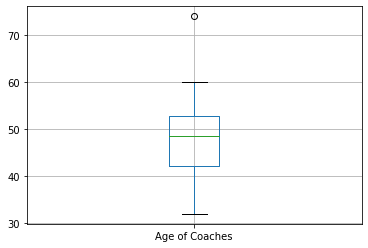

In [207]:
boxplot = Ages.boxplot(column=['Age of Coaches'])

# Comparison

# [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes.

since in this RQ we are just interested in "pass" events, we filter the rows that has eventId=8

In [166]:
pass_events = events[events.eventId == 8]
pass_events

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.409746,179896442,2516739,1H,15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",85,Simple pass,[{'id': 1801}],2446
1,8,Pass,2.506082,179896443,2516739,1H,14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",85,Simple pass,[{'id': 1801}],2446
2,8,Pass,6.946706,179896444,2516739,1H,14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",85,Simple pass,[{'id': 1801}],2446
3,8,Pass,10.786491,179896445,2516739,1H,14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",85,Simple pass,[{'id': 1801}],2446
4,8,Pass,12.684514,179896446,2516739,1H,14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",85,Simple pass,[{'id': 1801}],2446
5,8,Pass,15.530516,179896447,2516739,1H,40657,"[{'y': 4, 'x': 27}, {'y': 1, 'x': 18}]",85,Simple pass,[{'id': 1801}],2446
6,8,Pass,17.507003,179896448,2516739,1H,14803,"[{'y': 1, 'x': 18}, {'y': 1, 'x': 28}]",85,Simple pass,[{'id': 1801}],2446
7,8,Pass,18.404516,179896449,2516739,1H,40657,"[{'y': 1, 'x': 28}, {'y': 20, 'x': 30}]",85,Simple pass,[{'id': 1802}],2446
8,8,Pass,19.312823,179896458,2516739,1H,15811,"[{'y': 80, 'x': 70}, {'y': 91, 'x': 70}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",2444
9,8,Pass,20.551997,179896460,2516739,1H,14732,"[{'y': 91, 'x': 70}, {'y': 81, 'x': 76}]",85,Simple pass,[{'id': 1801}],2444


Now we want to know about accurate passes so we filter rows that contain tag id 1801

In [167]:
acc_passes = pass_events[pass_events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]

In [168]:
acc_passes.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.409746,179896442,2516739,1H,15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",85,Simple pass,[{'id': 1801}],2446
1,8,Pass,2.506082,179896443,2516739,1H,14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",85,Simple pass,[{'id': 1801}],2446
2,8,Pass,6.946706,179896444,2516739,1H,14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",85,Simple pass,[{'id': 1801}],2446
3,8,Pass,10.786491,179896445,2516739,1H,14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",85,Simple pass,[{'id': 1801}],2446
4,8,Pass,12.684514,179896446,2516739,1H,14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",85,Simple pass,[{'id': 1801}],2446


Now we calculate the ratio of accurate passes

In [155]:
ratio = ( acc_passes["playerId"].value_counts() / pass_events["playerId"].value_counts() ).sort_values(ascending=[False])
ratio

0         1.000000
391551    1.000000
3460      1.000000
15254     1.000000
472696    1.000000
471968    1.000000
503185    1.000000
256776    1.000000
286823    1.000000
337656    1.000000
372316    1.000000
15800     0.965517
14821     0.962963
520617    0.947368
365880    0.937500
14822     0.932203
356906    0.930233
15122     0.929385
134383    0.928709
3345      0.928457
360992    0.921466
14778     0.920901
15188     0.919911
3416      0.917341
3281      0.914405
134369    0.910433
209091    0.909688
14887     0.909247
14842     0.907294
20475     0.907124
            ...   
38079     0.665158
224965    0.664207
272338    0.660934
15194     0.660920
228765    0.655914
239191    0.654206
15804     0.645455
15821     0.641509
127796    0.640625
16609     0.636364
373350    0.625000
69616     0.600000
15244     0.600000
8537      0.600000
269189    0.597015
15695     0.596386
216077    0.588235
15877     0.572881
99437     0.504202
279721    0.500000
15201     0.500000
3708      0.

As you can see some of our rows have value 1. lets evaluate one of this points :

In [157]:
print(acc_passes["playerId" ].value_counts()[3460])
print(pass_events["playerId" ].value_counts()[3460])

2
2


This player had only 2 passes and all of them were accurate so we can't judge whether he is a good palyer or not based on this information. Now we put a threshhold to solve this problem. for setting a threshold, it's good to have an initial understanding of our data:






In [158]:
pass_events["playerId"].value_counts().describe()

count     473.000000
mean      552.773784
std       460.591732
min         1.000000
25%       136.000000
50%       467.000000
75%       883.000000
max      2125.000000
Name: playerId, dtype: float64

As you can see the first quartile is 136 and it means that 75% of our population had more than 136 passes, also the mean is 552, so it seems fair to set the threshold equal to 136. let's see :

In [159]:
countA = pass_events.playerId.value_counts()
countB = countA[countA.apply(lambda x : x > 157)]
countB.head(10)

14842     2125
15937     1957
14795     1929
14991     1922
224593    1854
15806     1829
340646    1797
14687     1760
14778     1732
89559     1643
Name: playerId, dtype: int64

Now, I calculate the ratio :

In [160]:
rate = (acc_passes["playerId"].value_counts()/ countB).sort_values(ascending=[False]).dropna()
rate[0:10]

15122     0.929385
134383    0.928709
3345      0.928457
360992    0.921466
14778     0.920901
15188     0.919911
3416      0.917341
3281      0.914405
134369    0.910433
209091    0.909688
Name: playerId, dtype: float64

In [161]:
ratio = pd.DataFrame({"wyId": rate.index , "ratio" : rate.values})
ratio.head(10)

,wyId,ratio
0,15122,0.929385
1,134383,0.928709
2,3345,0.928457
3,360992,0.921466
4,14778,0.920901
5,15188,0.919911
6,3416,0.917341
7,3281,0.914405
8,134369,0.910433
9,209091,0.909688


We can also extract the name of these players

In [162]:
ratio ["Last name"] = ratio.merge(players, on = "wyId")["lastName"]

In [163]:
ratio.head(10)

,wyId,ratio,Last name
0,15122,0.929385,Maroh
1,134383,0.928709,S\u00fcle
2,3345,0.928457,Alc\u00e2ntara do Nascimento
3,360992,0.921466,Zakaria Lako Lado
4,14778,0.920901,Toprak
5,15188,0.919911,Baumgartlinger
6,3416,0.917341,Mart\u00ednez Aginaga
7,3281,0.914405,Bernat Velasco
8,134369,0.910433,Meyer
9,209091,0.909688,Tolisso


# [RQ5] Does being a tall player mean winning more air duels?

in this RQ we want to know if there is any ralations between the height of a player and winning air duels or not. We need to work on England event dataset to extract data about air duels and also players dataset to extract data about the height of players

since we want to focus on air duel events, we should filter the rows of our dataframe to the ones with subEventId = 10

In [164]:
AirDuels = events[events.subEventId == 10]
AirDuels

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
16,1,Duel,32.492572,179896469,2516739,1H,14724,"[{'y': 23, 'x': 64}, {'y': 35, 'x': 40}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",2444
17,1,Duel,32.594806,179896453,2516739,1H,388267,"[{'y': 77, 'x': 36}, {'y': 65, 'x': 60}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
30,1,Duel,67.337992,179896470,2516739,1H,89559,"[{'y': 53, 'x': 63}, {'y': 25, 'x': 62}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",2446
31,1,Duel,67.357193,179896487,2516739,1H,15811,"[{'y': 47, 'x': 37}, {'y': 75, 'x': 38}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444
86,1,Duel,209.497324,179896555,2516739,1H,14817,"[{'y': 92, 'x': 45}, {'y': 80, 'x': 63}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",2444
87,1,Duel,209.541720,179896523,2516739,1H,40657,"[{'y': 8, 'x': 55}, {'y': 20, 'x': 37}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
99,1,Duel,240.371373,179896566,2516739,1H,14724,"[{'y': 13, 'x': 61}, {'y': 13, 'x': 78}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444
100,1,Duel,241.648107,179896541,2516739,1H,258253,"[{'y': 87, 'x': 39}, {'y': 87, 'x': 22}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",2446
109,1,Duel,270.115498,179896553,2516739,1H,165425,"[{'y': 76, 'x': 52}, {'y': 83, 'x': 58}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
223,1,Duel,720.028499,179896685,2516739,1H,14817,"[{'y': 30, 'x': 63}, {'y': 29, 'x': 62}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444


since we want to calculate the rate of winning duels the next step is to filter the rows with tag Id = 1801 (I consider both won and neutral duels)

In [165]:
acc_duel = AirDuels[AirDuels["tags"].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(1801).any())]
acc_duel

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
17,1,Duel,32.594806,179896453,2516739,1H,388267,"[{'y': 77, 'x': 36}, {'y': 65, 'x': 60}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
31,1,Duel,67.357193,179896487,2516739,1H,15811,"[{'y': 47, 'x': 37}, {'y': 75, 'x': 38}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444
87,1,Duel,209.541720,179896523,2516739,1H,40657,"[{'y': 8, 'x': 55}, {'y': 20, 'x': 37}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
99,1,Duel,240.371373,179896566,2516739,1H,14724,"[{'y': 13, 'x': 61}, {'y': 13, 'x': 78}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444
109,1,Duel,270.115498,179896553,2516739,1H,165425,"[{'y': 76, 'x': 52}, {'y': 83, 'x': 58}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
223,1,Duel,720.028499,179896685,2516739,1H,14817,"[{'y': 30, 'x': 63}, {'y': 29, 'x': 62}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2444
318,1,Duel,974.322616,179896773,2516739,1H,228768,"[{'y': 85, 'x': 60}, {'y': 89, 'x': 63}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
617,1,Duel,2002.027280,179897164,2516739,1H,228768,"[{'y': 72, 'x': 53}, {'y': 53, 'x': 8}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",2446
661,1,Duel,2174.417519,179897113,2516739,1H,14726,"[{'y': 66, 'x': 31}, {'y': 61, 'x': 53}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",2444
662,1,Duel,2174.683818,179897231,2516739,1H,89559,"[{'y': 34, 'x': 69}, {'y': 39, 'x': 47}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",2446


we should set a threshold to ignore data that may lead us to misjudgment(in this case players that had very low total air duels). For setting the threshold, we should have a basic understanding of our data. So I use describe function on total count of Airduels for each player.

In [166]:
duelCount = AirDuels["playerId"].value_counts()
duelCount.describe()

count     451.000000
mean       65.294900
std       117.517259
min         1.000000
25%        16.000000
50%        44.000000
75%        84.000000
max      2202.000000
Name: playerId, dtype: float64

the first interval is 16 and by setting it as a threshold we're gonna ignore 25% of our population I'm goona set the thershold a little bit less than the first quartile to see what would happen. t =13

In [167]:
duelCount2 = duelCount[duelCount.apply(lambda x : x >13)]

In [168]:
ratio = (acc_duel["playerId"].value_counts() / duelCount2).sort_values(ascending=[False]).dropna()
ratio                                                                     

14914     1.000000
14847     1.000000
253822    1.000000
15795     1.000000
54579     0.928571
15265     0.882353
26115     0.866667
15032     0.833333
14716     0.816327
8315      0.809524
15771     0.808824
14689     0.800000
391643    0.800000
38082     0.782609
25861     0.769231
3335      0.765625
3566      0.756098
18670     0.755556
15256     0.740741
255387    0.725000
393247    0.724638
14715     0.724138
221172    0.724138
15069     0.720000
26021     0.719697
18579     0.719512
134383    0.719512
49856     0.717791
14798     0.717742
258253    0.717391
            ...   
208716    0.333333
258264    0.333333
15231     0.333333
15107     0.333333
64995     0.327381
217052    0.320000
254649    0.318182
15804     0.315789
491365    0.305085
51132     0.294118
233910    0.294118
14770     0.291667
224971    0.285714
391606    0.285714
345707    0.282609
15024     0.280000
70975     0.277778
15942     0.264706
284469    0.263158
37948     0.262136
279780    0.250000
18591     0.

Let's extract the number of total air duels that 2 players with ratio of 1 had

In [169]:
print(duelCount[14914])
print(duelCount[14847])
print(duelCount[253822])
print(duelCount[15795])

14
20
15
21


since the mean of total air duels is 65,I think it is fair to ignore players who had less than 22 air duels. So I'm gonna increase my threshold to 22.

In [170]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >22)]

In [171]:
duelCount3 = duelCount[duelCount.apply(lambda x : x >22)]
ratio = (acc_duel["playerId"].value_counts() / duelCount3).sort_values(ascending=[False]).dropna()


Now it's time to make a plot. before plotting, I put all the data that we need for creating a plot in a dataframe

In [172]:
info = pd.DataFrame({'wyId' :ratio.index , 'ratio' : ratio.values})
info.head()

,wyId,ratio
0,26115,0.866667
1,14716,0.816327
2,15771,0.808824
3,14689,0.800000
4,38082,0.782609


In [173]:
info ["height"] = info.merge(players, on = "wyId")["height"]


In [174]:
info

,wyId,ratio,height
0,26115,0.866667,196.0
1,14716,0.816327,192.0
2,15771,0.808824,191.0
3,14689,0.800000,198.0
4,38082,0.782609,193.0
5,25861,0.769231,188.0
6,3335,0.765625,184.0
7,3566,0.756098,183.0
8,18670,0.755556,183.0
9,15256,0.740741,178.0


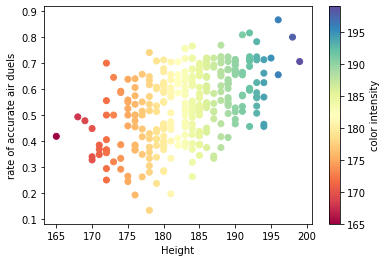

In [175]:
y = info["ratio"]
x = info["height"]
plt.xlabel("Height")
plt.ylabel("rate of accurate air duels")
plt.scatter(x,y , c = info["height"], cmap = 'Spectral' )
cbar = plt.colorbar()
cbar.set_label('color intensity')

As we can see in the scatter plot, as the value of height increases, the value of rate of accurate air duels tend to increase. So there is a positive relationship between these 2 variables

# [RQ6] Free your mind!
For this task, we need to find another interesting result about the dataset we've been working on. 

#### Lefty percentage
We thought about finding some unexpected differences between the percentage of left-footed vs right-footed players, and in particular which role showed the most interesting results.

It's a known fact that 10% of the population is left-handed, while the rest is in majority right-handed and, for a tiny part, ambidextrous. We wonder if being left-footed can be an advantage into the field and where, during a competitive match.


---

Let's start to look at the 'players' dataframe

In [170]:
players.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


We divide this dataframes into 'left' and 'right' dataframes, which got the 'foot' values left and right.

In [172]:
left = pd.DataFrame(players.loc[players['foot'] == 'left'])
left[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
12,"{'name': 'Mali', 'id': '466', 'alpha3code': 'M...",1992-01-01,null,3795,Charles,left,180,Traor\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",C. Traor\u00e9,74,393284


In [173]:
right = pd.DataFrame(players.loc[players['foot'] == 'right'])
right[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


Now we try to have a general idea about the percentage of left-footed in respect to the players population.

In [176]:
a = len(left.index)
b = len(right.index)

In [177]:
percentage_lefty = str(round(a/(a+b) * 100, 0)) + '%'
percentage_lefty

'24.0%'

We can already notice that this percentage is much more higher than the common value, so there must be some hidden advantage here.

So, we plot the different quantities for every player role.

####  We create the four dataframes for all the possibile roles

In [178]:
def histo(f,g):#plot the histogram for every couple of dataframes
    x = np.arange(2)
    plt.bar(x, height= [f,g] , color = ['red', 'green'])
    plt.xticks(x, ['Left','Right']);
def p(n):#compute the percentage
    return n[0]/(n[0]+n[1]) * 100

In [179]:
defleft = pd.DataFrame(left.loc[left['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])#choosing the right 'role' from the left dataframe
defl = len(defleft.index)#counting the rows
defright = pd.DataFrame(right.loc[right['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])
defr = len(defright.index)
n = [defl, defr]
p(n)

32.151898734177216

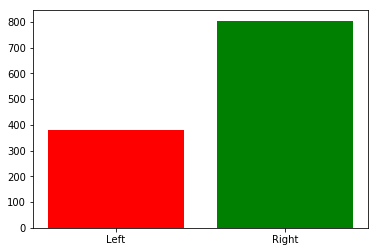

In [209]:
histo(defl, defr)

In [180]:
gkleft = pd.DataFrame(left.loc[left['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkl = len(gkleft.index)
gkright = pd.DataFrame(right.loc[right['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkr = len(gkright.index)
p([gkl,gkr])

13.526570048309178

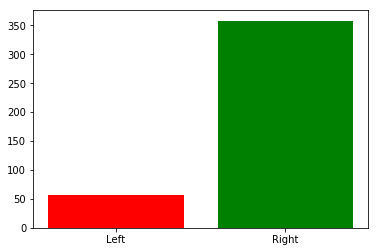

In [211]:
histo(gkl, gkr)

In [212]:
mdleft = pd.DataFrame(left.loc[left['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdright = pd.DataFrame(right.loc[right['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdl = len(mdleft.index)
mdr = len(mdright.index)
p([mdl,mdr])

22.1953188054883

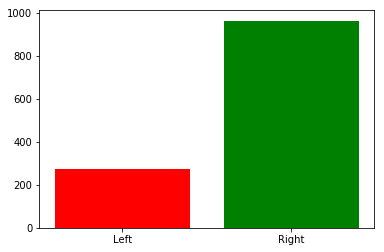

In [213]:
histo(mdl, mdr)

In [214]:
fwleft = pd.DataFrame(left.loc[left['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwright = pd.DataFrame(right.loc[right['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwl = len(fwleft.index)
fwr = len(fwright.index)
p([fwl,fwr])

17.796610169491526

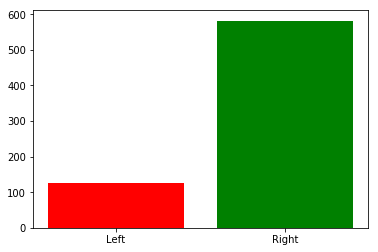

In [215]:
histo(fwl, fwr)

So, we notice that even if the percentages are all over 10%, the only roles where we can see some intersting insights are DF with 32% and MD with 22%.

The main reason might be that defenders and midfielders need to react to the actions of attackers, that are generally right-footed, and so tend to play the ball on the right side during a duel, which is the left side for an observer who is in front of the player, so on his own left.
Therefore, a player that can instictively go left is at advantage against the average stricker.

In fact, the ultimate defender, the GK, doesn't need to be left-footed to win duels, so the percentage returns to more low and common levels. 

# Core Research Questions


# [CRQ1] What are the time slots of the match with more goals?

In [181]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.409746,179896442,2516739,1H,15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",85,Simple pass,[{'id': 1801}],2446
1,8,Pass,2.506082,179896443,2516739,1H,14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",85,Simple pass,[{'id': 1801}],2446
2,8,Pass,6.946706,179896444,2516739,1H,14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",85,Simple pass,[{'id': 1801}],2446


Now I want to set different intervals like [0,9) , [9,18) ,... . First I filter the dataset based on the value of match period(1H , 2H) and then in each half of the match create 5 time slots. if the time of the an events is more than 45 minutes in first or second half of the game it should be in E1 or E2 time slot

In [183]:
first = events[events.matchPeriod == "1H"]
slot11 = first[first.eventSec/60 < 9]
s12 = first[first.eventSec/60 >= 9]
slot12 = s12[s12.eventSec/60 < 18]
s13 = first[first.eventSec/60 >= 18]
slot13 = s13[s13.eventSec/60 < 27]
s14 = first[first.eventSec/60 >= 27]
slot14 = s14[s14.eventSec/60 < 36]
s15 = first[first.eventSec/60 >= 36]
slot15 = s15[s15.eventSec/60 <= 45]



second = events[events.matchPeriod == "2H"]
slot21 = second[second.eventSec/60 < 9]
s22 = second[second.eventSec/60 >= 9]
slot22 = s22[s22.eventSec/60 < 18]
s23 = second[second.eventSec/60 >= 18]
slot23 = s23[s23.eventSec/60 < 27]
s24 = second[second.eventSec/60 >= 27]
slot24 = s24[s24.eventSec/60 < 36]
s25 = second[second.eventSec/60 >= 36]
slot25 = s25[s25.eventSec/60 <= 45]



E1 =first[first.eventSec/60 >45]
E2 = second[second.eventSec/60 >45]







In this step we restrict the rows of our datasets to the the ones that contain goal events (tag id = 101

In [184]:
goal11 = slot11[slot11['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal12 = slot12[slot12['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal13 = slot13[slot13['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal14 = slot14[slot14['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal15 = slot15[slot15['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]


goal21 = slot21[slot21['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal22 = slot22[slot22['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal23 = slot23[slot23['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal24 = slot24[slot24['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goal25 = slot25[slot25['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]

In [185]:
goalE1 = E1[E1['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goalE2 = E2[E2['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]

The number of goals in each time slot is equal to the number of rows of the dataframe which is related to that time slot. Then for making a bar plot we create a dataframe with indexes equal to time slots and a column of number of goals

In [186]:
data = {"H1[0,9)" :len(goal11.index), "H1[9,18)": len(goal12.index),"H1[18,27)" : len(goal13.index), "H1[27,36)" :len(goal14.index), "H1[36,45]" : len(goal15.index),
              "H2[0,9)" : len(goal21.index),"H2[9,18)" : len(goal22.index), "H2[18,27)" : len(goal23.index), 
            "H2[27,36)" : len(goal24.index), "H2[36,45]" :len(goal25.index), "+45" : len(goalE1.index),"+90" : len(goalE2.index )}
goalTime= pd.DataFrame.from_dict(data, orient='index' , columns=["goals"])
goalTime



,goals
"H1[0,9)",119
"H1[9,18)",143
"H1[18,27)",180
"H1[27,36)",130
"H1[36,45]",155
"H2[0,9)",160
"H2[9,18)",178
"H2[18,27)",170
"H2[27,36)",182
"H2[36,45]",155


now we create a barplot which shows the number of goals in each time slot

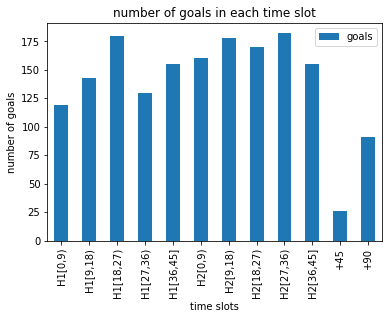

In [187]:
goalTime.plot.bar(title = 'number of goals in each time slot')
plt.xlabel('time slots')
plt.ylabel('number of goals')
plt.show()

# Second Part

Now we want to Find the top 10 teams that scored the most in the interval [81-90). the data set related to that time slot is goal25, so we start our analysis on this dataset. we can count the number of rows that each teamId has on the goal25 dataset

In [189]:
m = (goal25["teamId"].value_counts()).head(10)
m

2455    16
2482    15
2481    13
2444    12
2975    10
2453     9
2449     9
2462     8
2447     8
2463     8
Name: teamId, dtype: int64

To make our results more organized, I put it in a dataframe and also add a name column to the dataframe

In [190]:
top10 = pd.DataFrame({'wyId' : m.index ,'goals' : m.values})
top10

,wyId,goals
0,2455,16
1,2482,15
2,2481,13
3,2444,12
4,2975,10
5,2453,9
6,2449,9
7,2462,8
8,2447,8
9,2463,8


now er can check the name of these teams using teams database 

In [193]:
teams.head(3)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691


 I use merge function to extract the rows of teams dataframe that has same wyId as top10 datafeame and the put the name column value of those rows in name column of top10 dataframe

In [194]:
top10["name"] = top10.merge(teams, on = "wyId")["name"]
top10

,wyId,goals,name
0,2455,16,Hannover 96
1,2482,15,Hoffenheim
2,2481,13,Augsburg
3,2444,12,Bayern M\u00fcnchen
4,2975,10,RB Leipzig
5,2453,9,Freiburg
6,2449,9,Schalke 04
7,2462,8,Eintracht Frankfurt
8,2447,8,Borussia Dortmund
9,2463,8,K\u00f6ln


# Third part

In this part we want to know if there are players that were able to score at least one goal in 8 different intervals. My strategy in this part is to create a data frame which contains playerIds and 12 columns with boolean values, and the value is true if the player scored in that time slot 

In [195]:
goals = events[events['tags'].apply(lambda x: pd.Series([dict['id'] for dict in x]).eq(101).any())]
goals

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
178,10,Shot,529.393731,179896639,2516739,1H,134383,"[{'y': 59, 'x': 95}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",2444
179,9,Save attempt,531.670523,179896637,2516739,1H,14768,"[{'y': 100, 'x': 100}, {'y': 41, 'x': 5}]",90,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",2446
349,10,Shot,1078.302328,179896833,2516739,1H,209091,"[{'y': 53, 'x': 98}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",2444
350,9,Save attempt,1079.867480,179896805,2516739,1H,14768,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 2}]",90,Reflexes,"[{'id': 101}, {'id': 1202}, {'id': 1802}]",2446
973,3,Free Kick,421.309818,179897463,2516739,2H,14817,"[{'y': 50, 'x': 89}, {'y': 39, 'x': 89}]",35,Penalty,"[{'id': 101}, {'id': 402}, {'id': 1202}, {'id'...",2444
974,9,Save attempt,423.426304,179897512,2516739,2H,14768,"[{'y': 100, 'x': 100}, {'y': 50, 'x': 11}]",90,Reflexes,"[{'id': 101}, {'id': 1202}, {'id': 1802}]",2446
1136,10,Shot,1161.062618,179897673,2516739,2H,105619,"[{'y': 71, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",2446
1137,9,Save attempt,1162.396893,179897624,2516739,2H,14736,"[{'y': 0, 'x': 0}, {'y': 29, 'x': 9}]",90,Reflexes,"[{'id': 101}, {'id': 1209}, {'id': 1802}]",2444
3159,10,Shot,2325.296611,180021286,2516740,2H,69411,"[{'y': 43, 'x': 77}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",2482
3160,9,Save attempt,2327.341968,180021213,2516740,2H,253822,"[{'y': 100, 'x': 100}, {'y': 93, 'x': 90}]",90,Reflexes,"[{'id': 101}, {'id': 1204}, {'id': 1802}]",2443


First, I create a dataframe with playerIds from goasl dataframe

In [196]:
a = pd.DataFrame(goals.playerId.unique(),columns = ["playerId"])
a

,playerId
0,134383
1,14768
2,209091
3,14817
4,105619
5,14736
6,69411
7,253822
8,15020
9,15032


and then I add 12 column with boolean values

In [197]:
a["goal1"] = a.playerId.isin(goal11.playerId)
a["goal2"] = a.playerId.isin(goal12.playerId)
a["goal3"] = a.playerId.isin(goal13.playerId)
a["goal4"] = a.playerId.isin(goal14.playerId)
a["goal5"] = a.playerId.isin(goal15.playerId)
a["goal6"] = a.playerId.isin(goal21.playerId)
a["goal7"] = a.playerId.isin(goal22.playerId)
a["goal8"] = a.playerId.isin(goal23.playerId)
a["goal9"] = a.playerId.isin(goal24.playerId)
a["goal10"]= a.playerId.isin(goal25.playerId)
a["goal11"]= a.playerId.isin(goalE1.playerId)
a["goal12"]=a.playerId.isin(goalE2.playerId)

In [198]:
a

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
0,134383,True,False,False,False,False,False,False,False,False,True,False,False
1,14768,True,True,True,True,True,True,True,True,True,True,False,True
2,209091,False,True,True,True,False,True,False,False,True,False,False,False
3,14817,True,True,True,True,True,True,True,True,True,True,False,True
4,105619,False,False,True,False,False,False,False,True,True,False,False,False
5,14736,True,True,True,True,True,True,True,True,True,True,False,False
6,69411,False,True,True,True,True,True,True,True,True,True,False,False
7,253822,True,True,True,True,True,True,True,True,True,True,True,True
8,15020,False,True,False,False,True,True,True,False,True,False,False,False
9,15032,True,True,True,False,True,True,True,True,True,True,True,True


In [199]:
x = a.sum(axis = 1)
x.head(5)

0    134385.0
1     14779.0
2    209096.0
3     14828.0
4    105622.0
dtype: float64

If I use sum(axis = 1) function, it is gonna calculate the sum value in each row. If we subtract the player Id from it we are gonna reach the total number of Trues or total number of time slots that a player scored in. so we do that and filter our dataframe to player Ids that have scored in 8 time slots or more

In [200]:
b = a[a.sum(1)-a.playerId>=8]
b

,playerId,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12
1,14768,True,True,True,True,True,True,True,True,True,True,False,True
3,14817,True,True,True,True,True,True,True,True,True,True,False,True
5,14736,True,True,True,True,True,True,True,True,True,True,False,False
6,69411,False,True,True,True,True,True,True,True,True,True,False,False
7,253822,True,True,True,True,True,True,True,True,True,True,True,True
9,15032,True,True,True,False,True,True,True,True,True,True,True,True
11,15265,True,True,True,True,True,True,True,True,True,True,True,True
13,9611,True,True,True,True,True,True,True,True,True,True,False,False
16,14914,True,True,True,True,True,True,True,True,True,True,False,True
18,14766,True,True,True,True,False,True,True,False,True,False,True,True


In [201]:
len(b.index)

32

so there are 37 players that scored in at least 8 time slots

# [CRQ2] Visualize movements and passes on the pitch!

Here we will focus our attention on the ares that a player covers during a match. In fact, for each event of the 'events' dataframe, we have a pair of coordinates that represent the starting point and the end point of an action.

This task is divided into 2 different types of visualizations, an heat map and a heat and arrow map.

### 1. Cristiano Ronaldo vs Leonél Messi

Here, we will cover only the match Barcelona - Real Madrid played on the 6 May 2018.

In [202]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch


Let's define some functions that we will use later.

In [217]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

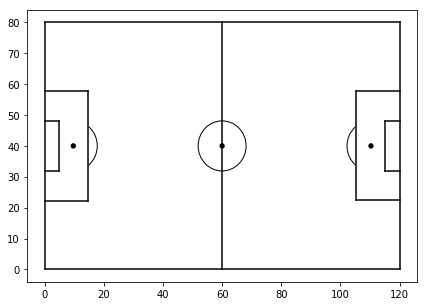

In [218]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [219]:
#Function to plot the heat map
def green(d):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    #Coordinate of player starting position
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30);

In [220]:
#We define the tagg function, that will create a list of all the numbers associate with 'id'
def tagg(x):
    v = []
    for i in range(len(x)):
        v.append(x.iloc[i])
    for i in range(len(v)):
        v[i] = [d['id'] for d in v[i]]
    return v

In [221]:
#Function to plot the heat map with the arrow map in the second part of the task
def calcio(d, v):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)#We draw the field
    plt.axis('off')#We get rid of axis
    
    #These are the starting positions we need for the heat map
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]

    for i in range(len(d)):
        # can also differentiate by color
        color = 'blue' if 1801 in v[i] else 'red'#red if pass is inaccurate
        #We print the arrows,using the start and the end positions of each event
        ax.annotate("", xy = ((d.iloc[i]['positions'][1]['x'])*1.2, (d.iloc[i]['positions'][1]['y'])*0.8), xycoords = 'data',
                   xytext = ((d.iloc[i]['positions'][0]['x'])*1.2, (d.iloc[i]['positions'][0]['y'])*0.8), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    #This print the heat map
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    return plt.show()
    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos

Let's start opening the json files and creating the dataframes that we need.

In [222]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Spain.json', 'r') as myfile:
    data = myfile.read()
m = json.loads(data)
Spain = pd.DataFrame(m)

Now, we search for the players that we need: Cristiano Ronaldo and Leonél Messi.

In [223]:
players.loc[players['firstName'] == 'Cristiano Ronaldo']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",1985-02-05,9905,3159,Cristiano Ronaldo,right,187,dos Santos Aveiro,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Cristiano Ronaldo,83,3322


In [224]:
players.loc[players['lastName'] == 'Messi Cuccittini']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
207,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1987-06-24,12274,676,Lionel Andr\u00e9s,left,170,Messi Cuccittini,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",L. Messi,72,3359


#### Let's start analyzing Cristiano Ronaldo

These are all of the Ronaldo's actions during the La Liga season.

In [225]:
criact = events.loc[events['playerId'] == 3322]
criact.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
76412,1,Duel,28.108732,189337977,2565596,1H,3322,"[{'y': 26, 'x': 96}, {'y': 27, 'x': 91}]",11,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",675
76414,10,Shot,31.052085,189337978,2565596,1H,3322,"[{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",675
76457,8,Pass,146.902499,189338004,2565596,1H,3322,"[{'y': 53, 'x': 68}, {'y': 67, 'x': 53}]",85,Simple pass,[{'id': 1801}],675
76589,10,Shot,548.744061,189338889,2565596,1H,3322,"[{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",675
76654,1,Duel,713.899672,189338224,2565596,1H,3322,"[{'y': 84, 'x': 62}, {'y': 81, 'x': 42}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",675


In [226]:
criact['eventName'].unique()

array(['Duel', 'Shot', 'Pass', 'Others on the ball', 'Foul', 'Free Kick',
       'Offside'], dtype=object)

#### Now, we consider only the 'eventName' values that we need

So, we search for: 'Duel', 'Shot', 'Pass' and 'Free Kick'.

In [227]:
a = pd.concat([criact.loc[criact['eventName'] == 'Duel'], criact.loc[criact['eventName'] == 'Shot'], criact.loc[criact['eventName'] == 'Pass'], criact.loc[criact['eventName'] == 'Free Kick']])

In [228]:
b = a.loc[a['matchId'] == 2565907]#Choosing the right match
b = b.reset_index(drop=True)#reindexing
b.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,68.618689,249644112,2565907,1H,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",13,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",675
1,1,Duel,69.411334,249644113,2565907,1H,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",675
2,1,Duel,114.548692,249644119,2565907,1H,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",12,Ground defending duel,"[{'id': 701}, {'id': 1802}]",675
3,1,Duel,275.327960,249644145,2565907,1H,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675
4,1,Duel,403.870069,249644178,2565907,1H,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675


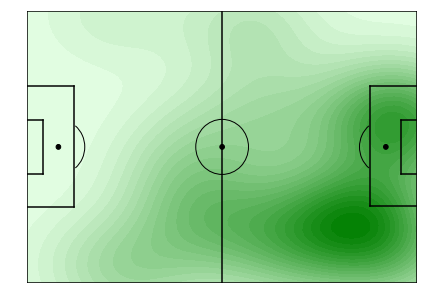

In [229]:
green(b)

#### Let's do the same analysis on Leonél Messi

In [230]:
messact = events.loc[events['playerId'] == 3359]

In [231]:
m = pd.concat([messact.loc[messact['eventName'] == 'Duel'], messact.loc[messact['eventName'] == 'Shot'], messact.loc[messact['eventName'] == 'Pass'], messact.loc[messact['eventName'] == 'Free Kick']])

In [232]:
rb = m.loc[m['matchId'] == 2565907]
rb = rb.reset_index(drop=True)
rb.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,122.168204,249644589,2565907,1H,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",11,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",676
1,1,Duel,294.661951,249644634,2565907,1H,3359,"[{'y': 57, 'x': 36}, {'y': 60, 'x': 34}]",13,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",676
2,1,Duel,429.449101,249644663,2565907,1H,3359,"[{'y': 62, 'x': 42}, {'y': 57, 'x': 36}]",11,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",676
3,1,Duel,432.507881,249644665,2565907,1H,3359,"[{'y': 69, 'x': 37}, {'y': 66, 'x': 41}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",676
4,1,Duel,693.128014,249644730,2565907,1H,3359,"[{'y': 43, 'x': 44}, {'y': 33, 'x': 35}]",13,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",676


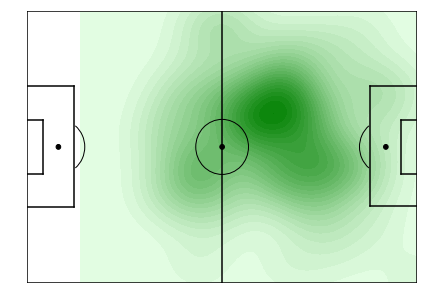

In [233]:
green(rb)

### Comments

By looking at the two plots, there are clearly strong differences:
1. Cristiano Ronaldo has been particularly active in two zones of the field, one inside and the other right outside the main area. Instead, Messi has only focused his game into the advanced midfield, a small and less dengerous place, during the match.
2. Cristiano Ronaldo has been moving all around the field, reaching areas outside his main zones.

This means that the defense of the Real Madrid was able to limit the movements of Messi and relegate him to a small area of the field, instead Cristiano Ronaldo, maybe thanks to his strenght and physique, has been a tough opponent for the Barcelona defence, in fact he managed to attack directly the goalkeeper.

### 2. Miralem Pjanic vs Jorginho
Let's start creating the Italy dataset, since Juventus and Napoli are two teams of Serie A.

In [234]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Italy.json', 'r') as myfile:
    data = myfile.read()
i = json.loads(data)
Italy = pd.DataFrame(i)
Italy.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


We need the wyId code to find this match even in 'events' dataset, to choose the players actions of the right match.

In [235]:
Italy.loc[Italy['label'] == 'Juventus - Napoli, 0 - 1']

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
41,524,"April 22, 2018 at 8:45:00 PM GMT+2",2018-04-22 18:45:00,Regular,34,"Juventus - Napoli, 0 - 1","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",,3187,2576295


The match Juventus - Napoli has wyId: 2576295

#### Miralem Pjanic plot of passes

Now we can search for the player Miralem Pjanic in the 'players' dataset, we need his wyId code.

In [236]:
pia = players.loc[players['firstName'] == 'Miralem']
pia

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


#### Making the heat-arrow plot

In [237]:
#Opening and loading the json file 'events_Italy'
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Italy.json', 'r') as myfile:
    data = myfile.read()
evit = json.loads(data)
Itaev = pd.DataFrame(evit)#Creating a pandas dataframe

In [238]:
#These are all the passes of Pjanic during the match
Pjanic = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 20443) & (Itaev['eventName'] == 'Pass')]
Pjanic.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


In this visualization, we will plot the heat map and the arrow map concurrently, highlightning the accurate passes and the inaccurate ones.

In [239]:
tag = Pjanic['tags']#This is the 'tags' column that we will transform into a list of values
tag.head()

573105                                [{'id': 1801}]
573107                                [{'id': 1801}]
573126                  [{'id': 1401}, {'id': 1801}]
573220    [{'id': 1401}, {'id': 1001}, {'id': 1802}]
573225                                [{'id': 1801}]
Name: tags, dtype: object

In [240]:
v = tagg(tag)#Function described above
v[:5]

[[1801], [1801], [1401, 1801], [1401, 1001, 1802], [1801]]

Now, we can verify if a pass has been accurate or not by looking at the tag number 1801 for each event.

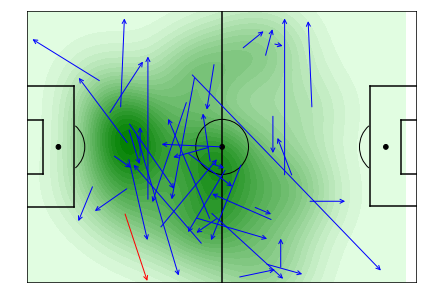

In [241]:
calcio(Pjanic,v)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

#### Jorginho plot of passes

In [242]:
jor = players.loc[players['firstName'] == 'Jorge Luiz'] #Searching for the wyId code of the player
jor

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


In [243]:
#Choosing only the event 'Pass'
Jorginho = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 21315) & (Itaev['eventName'] == 'Pass')]
Jorginho.head() 

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187
573237,8,Pass,456.587989,245487506,2576295,1H,21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",85,Simple pass,[{'id': 1801}],3187


In [244]:
tagj = Jorginho['tags']
tagj.head()

573145                  [{'id': 1801}]
573164    [{'id': 1401}, {'id': 1802}]
573188                  [{'id': 1801}]
573231                  [{'id': 1801}]
573237                  [{'id': 1801}]
Name: tags, dtype: object

In [245]:
w = tagg(tagj)
w[:5]

[[1801], [1401, 1802], [1801], [1801], [1801]]

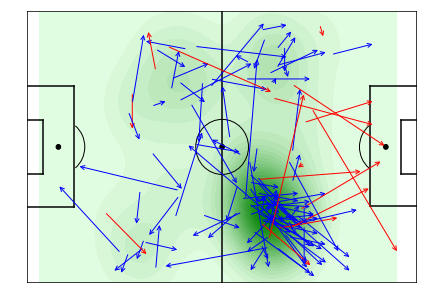

In [246]:
calcio(Jorginho,w)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

### Comments

By looking at the heat maps, we can clearly notice that even if both are midfielders, Jorginho is in a much more advanced position than Pjanic. The difference in the number of passes between the two players is once again on Jorginho's side, even though Pjanic manages to overcome it in terms of precision, with only one inaccurate pass. However, all the inaccurate passages of Jorginho are at least towards the attack area, while Pjanic not only never approached there, but none of his passes seems to be able to reach the area. So, going to look at the game statistics linked to the track of this exercise, we observe a 60% possession of Napoli, and one of 40% of Juventus, therefore, since the victory belongs to Napoli, perhaps it would have been better to concentrate on the quantity of forward passes, and not just on their accuracy.